# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
#pip install citipy

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
now = datetime.datetime.now()

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
#Creating base URL and empty dataframe
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q='
weather_df = pd.DataFrame({'City':[],
                        'Cloudiness':[],
                        'Country':[],
                        'Date':[],
                        'Humidity':[],
                        'Lat':[],
                        'Lng':[],
                        'Max_temp':[],
                        'Wind_speed':[]})

In [54]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name)

i = 0
for city in cities:    
    response_request = requests.get(url + city)
    response = response_request.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Item Number {i} {city}')
        print(response_request.url)

        weather_df.loc[i,'City'] = city
        weather_df.loc[i,'Cloudiness'] = response['clouds']['all']
        weather_df.loc[i,'Country'] = response['sys']['country']
        weather_df.loc[i,'Date'] = now.strftime("%Y-%m-%d") 
        weather_df.loc[i,'Humidity'] = response['main']['humidity']
        weather_df.loc[i,'Lat'] = response['coord']['lat']
        weather_df.loc[i,'Lng'] = response['coord']['lon']
        weather_df.loc[i,'Max_temp'] = response['main']['temp_max']
        weather_df.loc[i,'Wind_speed'] = response['wind']['speed']
    else:
        print('city not found: pass')

Item Number 1 cape town
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=cape%20town
Item Number 2 tasiilaq
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=tasiilaq
Item Number 3 antofagasta
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=antofagasta
Item Number 4 yellowknife
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=yellowknife
Item Number 5 xuddur
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=xuddur
city not found: pass
city not found: pass
Item Number 6 luderitz
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=luderitz
city not found: pass
Item Number 7 busselton
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50b

Item Number 59 marabba
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=marabba
Item Number 60 anchorage
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=anchorage
Item Number 61 nova odesa
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=nova%20odesa
Item Number 62 ponta do sol
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=ponta%20do%20sol
Item Number 63 thompson
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=thompson
Item Number 64 qaanaaq
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=qaanaaq
city not found: pass
Item Number 65 sinnamary
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=sinnamary
It

Item Number 117 victoria
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=victoria
Item Number 118 mar del plata
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=mar%20del%20plata
Item Number 119 broken hill
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=broken%20hill
Item Number 120 nador
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=nador
Item Number 121 inuvik
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=inuvik
Item Number 122 freeport
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=freeport
Item Number 123 avarua
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=avarua
Item Number 124 kaitangata

Item Number 175 brigantine
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=brigantine
Item Number 176 flin flon
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=flin%20flon
Item Number 177 port alfred
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=port%20alfred
Item Number 178 nyurba
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=nyurba
city not found: pass
city not found: pass
Item Number 179 baykit
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=baykit
Item Number 180 esperance
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=esperance
Item Number 181 quelimane
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=i

Item Number 233 tudela
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=tudela
Item Number 234 dalianwan
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=dalianwan
Item Number 235 ancud
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=ancud
city not found: pass
Item Number 236 roma
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=roma
Item Number 237 saint-raphael
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=saint-raphael
Item Number 238 isangel
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=isangel
Item Number 239 cayenne
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=cayenne
Item Number 240 kloulkl

city not found: pass
Item Number 291 mecca
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=mecca
Item Number 292 meulaboh
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=meulaboh
Item Number 293 immokalee
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=immokalee
Item Number 294 erenhot
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=erenhot
Item Number 295 suraabad
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=suraabad
city not found: pass
Item Number 296 ucluelet
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=ucluelet
Item Number 297 aguie
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=aguie
Item

Item Number 350 guamuchil
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=guamuchil
Item Number 351 pitimbu
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=pitimbu
Item Number 352 moate
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=moate
Item Number 353 sulangan
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=sulangan
Item Number 354 eyl
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=eyl
Item Number 355 markova
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=markova
Item Number 356 huntingdon
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=huntingdon
Item Number 357 shenjiamen
https://api.openweath

Item Number 408 otukpo
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=otukpo
Item Number 409 monastyryshche
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=monastyryshche
Item Number 410 sharjah
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=sharjah
Item Number 411 katsuura
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=katsuura
city not found: pass
Item Number 412 konevo
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=konevo
Item Number 413 buala
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=buala
Item Number 414 ternate
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=ternate
Item Number 415 nec

Item Number 466 tafresh
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=tafresh
Item Number 467 florianopolis
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=florianopolis
Item Number 468 matara
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=matara
Item Number 469 vakhtan
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=vakhtan
Item Number 470 sao benedito do rio preto
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=sao%20benedito%20do%20rio%20preto
city not found: pass
Item Number 471 alzamay
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=alzamay
Item Number 472 powell river
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c9

city not found: pass
Item Number 524 lufilufi
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=lufilufi
Item Number 525 shubarshi
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=shubarshi
Item Number 526 yar-sale
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=yar-sale
Item Number 527 kendari
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=kendari
Item Number 528 pacific grove
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=pacific%20grove
Item Number 529 mookane
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=mookane
Item Number 530 sebeta
https://api.openweathermap.org/data/2.5/weather?APPID=f3f97a3b8704719be2fa0cb1c99a50bf&units=imperial&q=sebeta
Item Nu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
#Export the city data into a .csv
weather_df.to_csv('weather_data.csv')

In [56]:
#Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,cape town,20.0,ZA,2019-05-24,59.0,-33.93,18.42,64.99,24.16
2,tasiilaq,20.0,GL,2019-05-24,69.0,65.61,-37.64,35.60,16.11
3,antofagasta,90.0,CL,2019-05-24,63.0,-23.65,-70.40,60.80,4.70
4,yellowknife,75.0,CA,2019-05-24,69.0,62.45,-114.38,39.20,6.93
5,xuddur,33.0,SO,2019-05-24,52.0,4.12,43.89,85.55,12.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

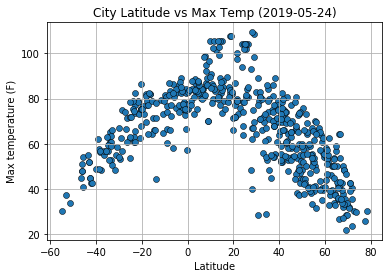

In [57]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels
plt.scatter(weather_df['Lat'],weather_df['Max_temp'], edgecolors = "black", linewidth = 0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title(f"City Latitude vs Max Temp ({weather_df.iloc[0]['Date']})")

#Save the plotted figures as .pngs
plt.savefig('lat_vs_temp.png')

#### Latitude vs. Humidity Plot

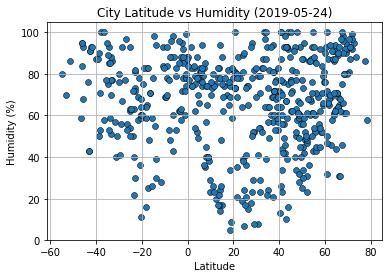

In [58]:
#repeat for humidity
plt.scatter(weather_df['Lat'],weather_df['Humidity'], edgecolors = "black", linewidth = 0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({weather_df.iloc[0]['Date']})")

plt.savefig('lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

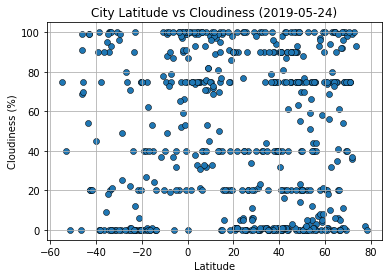

In [59]:
#repeat for cloudiness
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], edgecolors = "black", linewidth = 0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({weather_df.iloc[0]['Date']})")

plt.savefig('lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

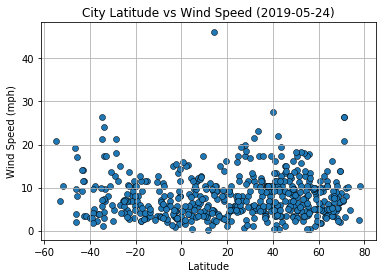

In [60]:
#repeat for windspeed
plt.scatter(weather_df['Lat'],weather_df['Wind_speed'], edgecolors = "black", linewidth = 0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed ({weather_df.iloc[0]['Date']})")

plt.savefig('lat_vs_windspeed.png')